In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd

In [3]:
review_ls = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멀캠-프로젝트/스터디_프로젝트/review_project/olive_app_review_crawling_final.csv')

In [4]:
review_ls.head()

,Unnamed: 0,날짜,별점,내용,추천
0,0,2022년 2월 7일,1,2/7 추가: 최신 버전 역시 여전히 느립니다. 피드백 반영도 안 하시면서 의견은 ...,238
1,1,2022년 2월 15일,1,"앱이 너무 느림, 리뷰달때 확인도 없이 바로 달림 길게써서 포인트 받을라 했는데 못...",0
2,2,2022년 2월 8일,1,진짜 별 하나도 아깝다.. 내가 내 돈주고 물건사려고 하는데 어플이 너무 느려서 장...,0
3,3,2022년 2월 8일,1,아 진짜 뭐하자는건지 모르겠네요 화나서 리뷰 쓰러 왔더니 많은 분들이 이미 지적을 ...,0
4,4,2022년 2월 4일,1,왜 별점이 2점대지..?싶을정도로 혜택도 많고 개좋은데 ㅜㅜㅜㅠ --->원래 별점 ...,11명


In [5]:
n_topics = 4

tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(review_ls)
svd = TruncatedSVD(n_components=n_topics, n_iter=100)

U = svd.fit_transform(tfidf)
Vt = svd.components_

In [6]:
len(review_ls)

2172

In [7]:
U.shape

(5, 4)

In [8]:
Vt.shape

(4, 5)

In [9]:
tfidf.shape

(5, 5)

In [10]:
vocab =  tfidf_vect.get_feature_names_out()
print(len(vocab))

5


In [11]:
Vt

array([[ 0.        , -0.48507125,  0.        ,  0.48507125,  0.72760688],
       [ 0.        ,  0.80033725, -0.35897908,  0.39855954,  0.26785181],
       [-0.        ,  0.30782202,  0.93334561,  0.15329213,  0.10301993],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [12]:
n = 4
for i, topic in enumerate(Vt):
    print("Topic {} :".format(i), [ (vocab[i], topic[i].round(3)) for i in topic.argsort()[:-n-1:-1]])

Topic 0 : [('추천', 0.728), ('별점', 0.485), ('내용', 0.0), ('unnamed', 0.0)]
Topic 1 : [('날짜', 0.8), ('별점', 0.399), ('추천', 0.268), ('unnamed', 0.0)]
Topic 2 : [('내용', 0.933), ('날짜', 0.308), ('별점', 0.153), ('추천', 0.103)]
Topic 3 : [('unnamed', 1.0), ('추천', 0.0), ('별점', 0.0), ('내용', 0.0)]


In [13]:
n = 3
temp = [0, 1, 2, 3, 4, 5]
temp[:-n:-1]

[5, 4]

In [14]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cosine_similarity(a, b):
    return dot(a, b) / (norm(a) * norm(b))

def calc_similarity_matrix(vectors):
    
    n_word = len(vectors)
    similarity_matrix = np.zeros((n_word, n_word))
    
    for i in range(n_word):
        for j in range(n_word):
            similarity_matrix[i, j] = cosine_similarity(vectors[i], vectors[j]).round(3)
            
    return similarity_matrix


In [15]:
vectors = Vt.T
word_similarity_matrix = calc_similarity_matrix(vectors)
word_similarity_matrix.shape

(5, 5)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family="Malgun Gothic") #windows
# plt.rc("font", family="AppleGothic") #mac

def visualize_similarity(similarity_matrix, label):
    mask = np.triu(np.ones_like(similarity_matrix, dtype=np.bool))
    plt.rcParams['figure.figsize'] = [8, 6]
    ax = sns.heatmap(similarity_matrix, mask=mask, xticklabels=label, yticklabels=label, 
                     annot=True, fmt=".2f", annot_kws={"size":8}, cmap="coolwarm") 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.s

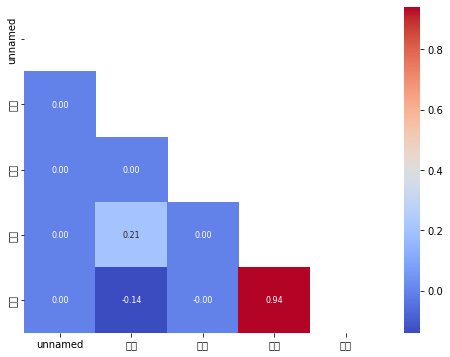

In [17]:
visualize_similarity(word_similarity_matrix, vocab)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/b

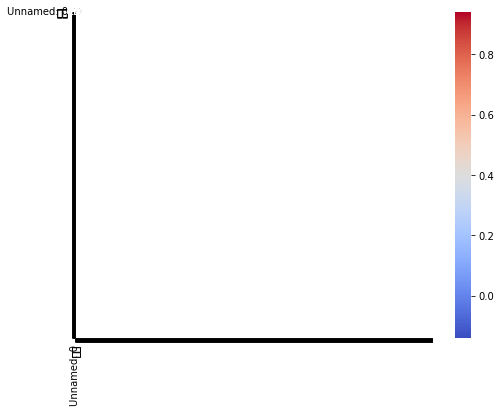

In [18]:
doc_similarity_matrix = calc_similarity_matrix(U)
visualize_similarity(doc_similarity_matrix, review_ls)

In [19]:
from sklearn.manifold import TSNE

def visualize_vectors(vectors, labels):
    tsne = TSNE(n_components=2, n_iter=10000, perplexity=2)
    T = tsne.fit_transform(vectors)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
    for label, x, y in zip(labels, T[:, 0], T[:, 1]):
        plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords="offset points")


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current fo

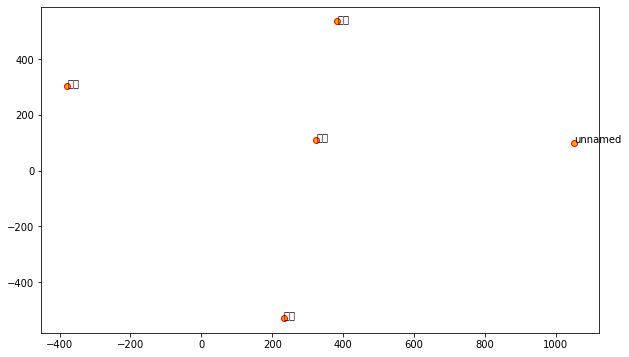

In [20]:
visualize_vectors(vectors, vocab)

In [21]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

import pandas as pd
from sklearn.datasets import fetch_20newsgroups


dataset = fetch_20newsgroups(shuffle=True, random_state=42, remove=("headers", "footer", "quotes"))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=f9c219d8a53ba4647fed3d68e6e818ae90c1e5dd233909134e3403191161a417
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [29]:
dataset['data'][:5]

[' I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n',
 "A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please

In [30]:
def get_news(news_dataset, apply_split=True):
    documents = news_dataset.data
    news_df = pd.DataFrame({"document": documents})
    news_df["clean_doc"] = news_df["document"].str.replace("[^a-zA-Z]", " ")
    news_df["clean_doc"] = news_df["clean_doc"].apply(lambda x : " ".join([w.lower() for w in x.split() if len(w) > 2]))
    tokenized_doc = news_df["clean_doc"].apply(lambda x: x.split())
    
    stop_words = stopwords.words('english')
    
    if apply_split:
        return tokenized_doc.apply(lambda x : [item for item in x if item not in stop_words])
    else:
        return tokenized_doc.apply(lambda x : " ".join([item for item in x if item not in stop_words]))
                                                      
    

In [24]:
tokenized_docs = get_news(dataset, False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [31]:
tokenized_docs[0]

'wondering anyone could enlighten car saw day door sports car looked late early called bricklin doors really small addition front bumper separate rest body know anyone tellme model name engine specs years production car made history whatever info funky looking car please mail thanks brought neighborhood lerxst'

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(tokenized_docs)
lda = LatentDirichletAllocation(n_components=5, max_iter=50, learning_method="online", random_state=42)
lda_output = lda.fit_transform(tfidf)

In [33]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vect, mds="tsne")
pyLDAvis.display(vis)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-on